# 1. Read in Image, Grayscale and Blur

In [332]:
!pip install easyocr
!pip install imutils

In [333]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

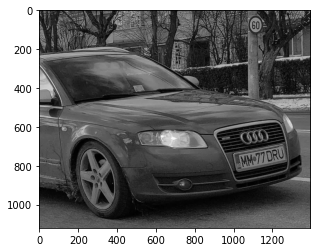

In [334]:
img = cv2.imread('img_4k_2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 2. Apply filter and find edges for localization


In [335]:
high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh
print(high_thresh)
print(lowThresh)

72.0
36.0


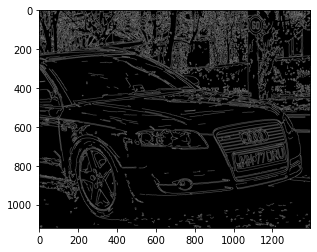

In [336]:
bfilter = cv2.bilateralFilter(gray, 7, 90, 90) #Noise reduction
edged = cv2.Canny(bfilter, lowThresh, high_thresh) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask


In [337]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
# contours

In [361]:
location = None
locations = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 18, True)
    if len(approx) == 4:
        location = approx
        locations.append(approx)
        break

In [362]:
location

array([[[1255,  691]],

       [[ 998,  735]],

       [[1011,  821]],

       [[1271,  779]]], dtype=int32)

In [363]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

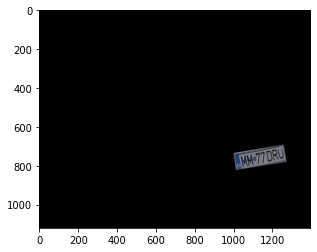

In [364]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [365]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

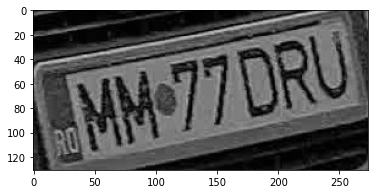

In [366]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 4. Use Easy OCR To Read Text

In [367]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19.975077640500377, 46.95015528100076],
   [264.96820673076655, 3.8157818537070742],
   [275.0249223594996, 83.04984471899924],
   [30.031793269233475, 127.18421814629292]],
  'MM7TDRU',
  0.6859233975410461)]

# 5. Render Result

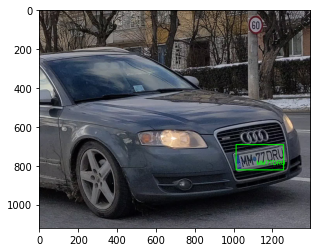

In [368]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0] - 140, approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
